In [5]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [6]:
df=pd.read_csv('happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


loaded the dataset into dataframe and printed the the first 5 rows

In [7]:
df.shape

(158, 12)

Checking the volume of the dataset found that , there are 12 cols and 158 rows

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

checked the null values, found no null values

In [9]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


(i) Dataset need the scaling 

(ii) All cols has same number of the rows 

(iii) There is outliers in the dataset 

In [10]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

There is no such skewness the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The dataset has two character type features and rest all are numerical

In [12]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [13]:
df['Happiness Rank'].value_counts()

82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: Happiness Rank, Length: 157, dtype: int64

In [14]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

# EDA 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
df.rename(columns={'Economy (GDP per Capita)':'GDP','Health (Life Expectancy)':'Life_Expectancy','Trust (Government Corruption)':'Corruption','Dystopia Residual':'Dystopia_Residual','Happiness Score':'Happiness_Score'},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   Life_Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [18]:
columns=['Country','Region','Family','GDP','Life_Expectancy','Freedom','Generosity','Corruption','Happiness_Score']

In [19]:
happy_df=df[columns].copy()

In [20]:
happy_df.head()

,Country,Region,Family,GDP,Life_Expectancy,Freedom,Generosity,Corruption,Happiness_Score
0,Switzerland,Western Europe,1.34951,1.39651,0.94143,0.66557,0.29678,0.41978,7.587
1,Iceland,Western Europe,1.40223,1.30232,0.94784,0.62877,0.43630,0.14145,7.561
2,Denmark,Western Europe,1.36058,1.32548,0.87464,0.64938,0.34139,0.48357,7.527
3,Norway,Western Europe,1.33095,1.45900,0.88521,0.66973,0.34699,0.36503,7.522
4,Canada,North America,1.32261,1.32629,0.90563,0.63297,0.45811,0.32957,7.427


Text(0, 0.5, 'GDP per capita')

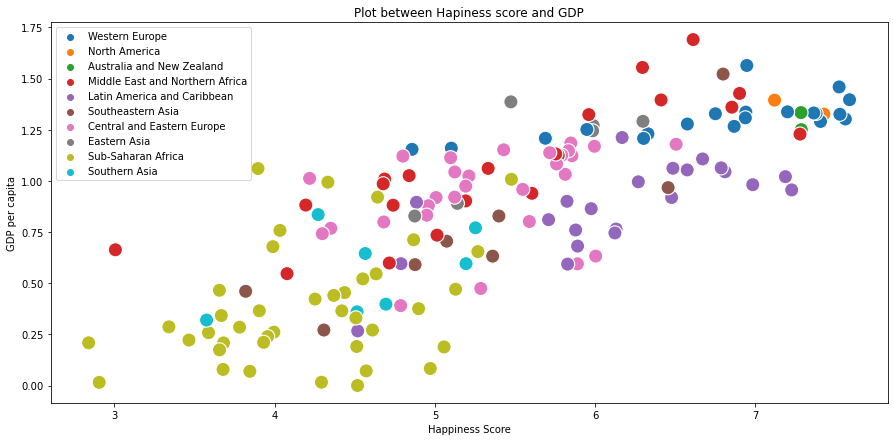

In [21]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between Hapiness score and GDP')
sns.scatterplot(x=df['Happiness_Score'],y=happy_df['GDP'],hue=df.Region,s=200)
plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness Score') 
plt.ylabel('GDP per capita')

Text(0, 0.5, '')

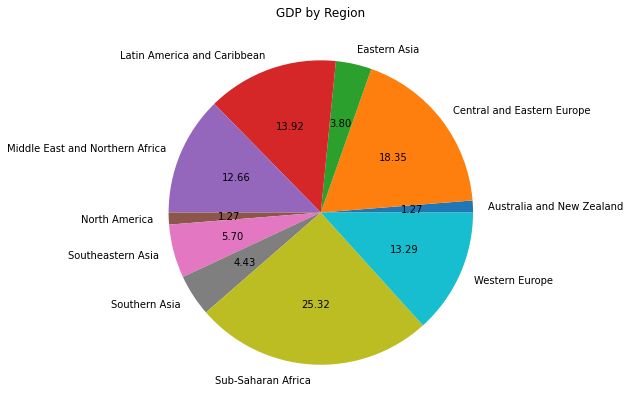

In [22]:
df.groupby(['Region']).size().plot(kind='pie',autopct='%.2f')
plt.title('GDP by Region')
plt.ylabel('')

In [23]:
total_country=df.groupby('Region')[['Country']].count()
print(total_country)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


In [24]:
total_freedom=df.groupby('Region')[['Freedom']].mean()
print(total_freedom)

                                  Freedom
Region                                   
Australia and New Zealand        0.645310
Central and Eastern Europe       0.358269
Eastern Asia                     0.462490
Latin America and Caribbean      0.501740
Middle East and Northern Africa  0.361751
North America                    0.589505
Southeastern Asia                0.557104
Southern Asia                    0.373337
Sub-Saharan Africa               0.365944
Western Europe                   0.549926


In [25]:
total_trust=df.groupby('Region')[['Corruption']].mean()
print(total_trust)


                                 Corruption
Region                                     
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463


In [26]:
Health_Life=df.groupby('Region')[['Life_Expectancy']].mean()
print(Health_Life)

                                 Life_Expectancy
Region                                          
Australia and New Zealand               0.919965
Central and Eastern Europe              0.718774
Eastern Asia                            0.877388
Latin America and Caribbean             0.703870
Middle East and Northern Africa         0.705615
North America                           0.883710
Southeastern Asia                       0.677357
Southern Asia                           0.540830
Sub-Saharan Africa                      0.282332
Western Europe                          0.909148


In [27]:
Dystopia_Residual=df.groupby('Region')[['Dystopia_Residual']].mean()
print(Dystopia_Residual)

                                 Dystopia_Residual
Region                                            
Australia and New Zealand                 2.265355
Central and Eastern Europe                2.021400
Eastern Asia                              1.681607
Latin America and Caribbean               2.622577
Middle East and Northern Africa           1.980008
North America                             2.480935
Southeastern Asia                         1.783020
Southern Asia                             2.016769
Sub-Saharan Africa                        2.019980
Western Europe                            2.151185


In [28]:
Generosity=df.groupby('Region')[['Generosity']].mean()
print(Generosity)

                                 Generosity
Region                                     
Australia and New Zealand          0.455315
Central and Eastern Europe         0.152264
Eastern Asia                       0.225885
Latin America and Caribbean        0.217788
Middle East and Northern Africa    0.190376
North America                      0.429580
Southeastern Asia                  0.419261
Southern Asia                      0.341429
Sub-Saharan Africa                 0.221137
Western Europe                     0.302109


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   Life_Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [73]:
df['Happiness Rank'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
       151, 152, 153, 155, 157], dtype=int64)

<BarContainer object of 10 artists>

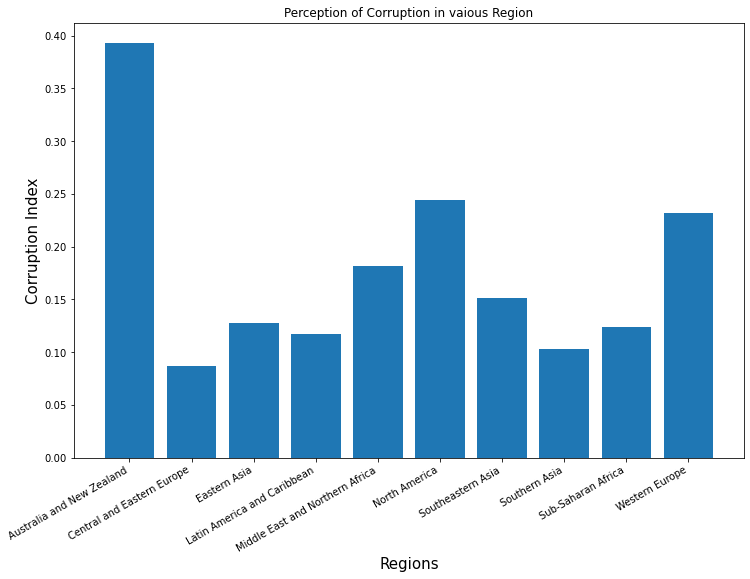

In [30]:
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in vaious Region')
plt.xlabel("Regions",fontsize=15)
plt.ylabel('Corruption Index',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(total_trust.index,total_trust.Corruption)

In [31]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

Text(603.9818181818181, 0.5, 'Life expectancy')

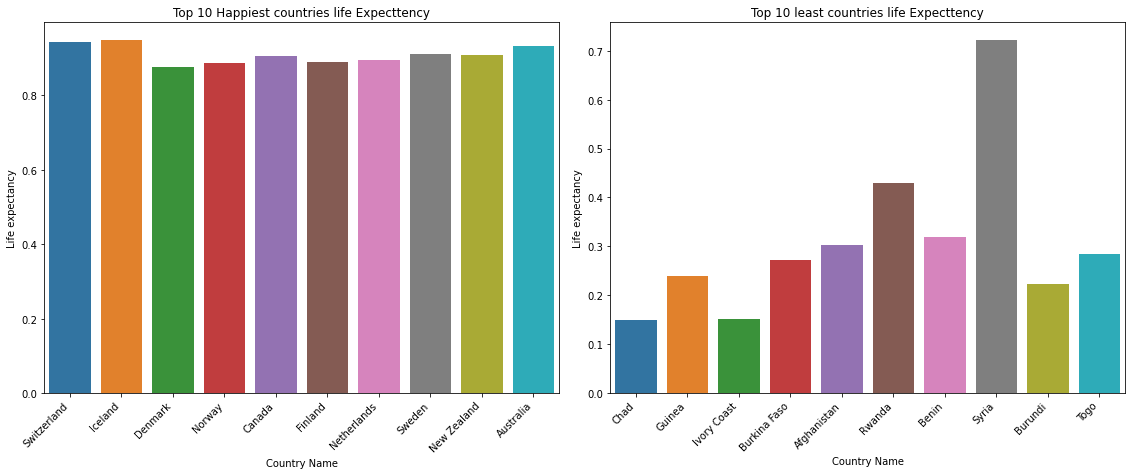

In [32]:
fig, axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=bottom_10.Country
axes[0].set_title('Top 10 Happiest countries life Expecttency')
axes[0].set_xticklabels(xlabels, rotation=45,ha='right')
sns.barplot(x=top_10.Country, y=top_10.Life_Expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life expectancy')


xlabels=bottom_10.Country
axes[1].set_title('Top 10 least countries life Expecttency')
axes[1].set_xticklabels(xlabels, rotation=45,ha='right')
sns.barplot(x=bottom_10.Country, y=bottom_10.Life_Expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life expectancy')


<BarContainer object of 10 artists>

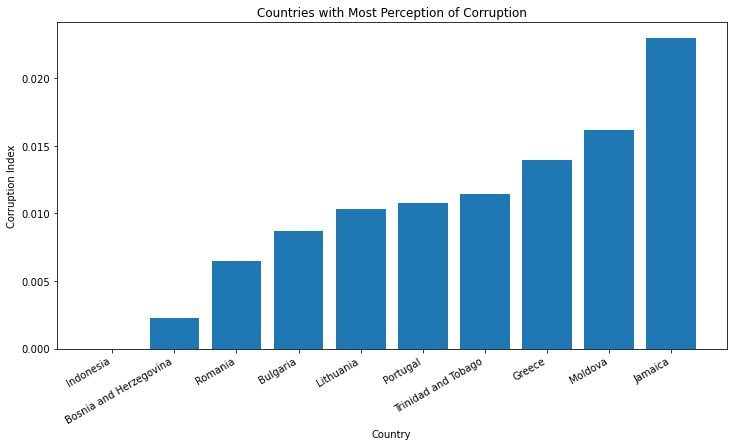

In [33]:
country=happy_df.sort_values(by='Corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country')
plt.ylabel('Corruption Index')
plt.xticks(rotation =30 ,ha='right')
plt.bar(country.Country,country.Corruption)

<BarContainer object of 10 artists>

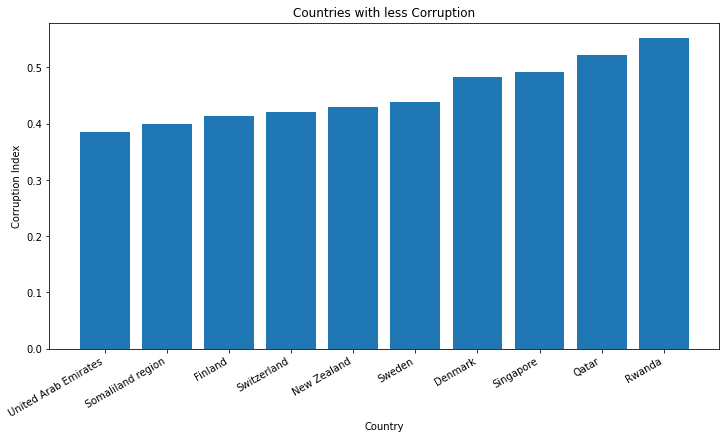

In [34]:
country=happy_df.sort_values(by='Corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with less Corruption')
plt.xlabel('Country')
plt.ylabel('Corruption Index')
plt.xticks(rotation =30 ,ha='right')
plt.bar(country.Country,country.Corruption)

<AxesSubplot:xlabel='Happiness_Score', ylabel='Corruption'>

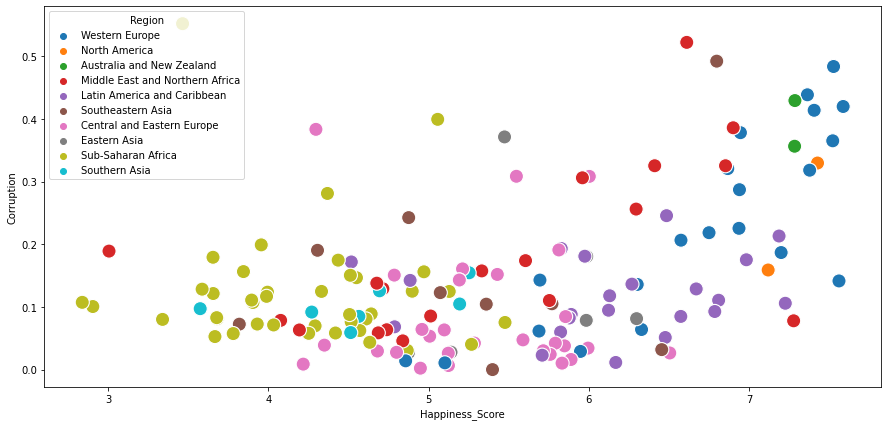

In [35]:
#corruption vs Happiness
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.Happiness_Score, y=happy_df.Corruption,hue=happy_df.Region,s=200)

In [36]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          158 non-null    object 
 1   Region           158 non-null    object 
 2   Family           158 non-null    float64
 3   GDP              158 non-null    float64
 4   Life_Expectancy  158 non-null    float64
 5   Freedom          158 non-null    float64
 6   Generosity       158 non-null    float64
 7   Corruption       158 non-null    float64
 8   Happiness_Score  158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   Life_Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [38]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [39]:
df['Region']=df['Region'].replace({"Sub-Saharan Africa":1,"Central and Eastern Europe":2,
                                  "Latin America and Caribbean":3,"Western Europe":4,
                                  "Middle East and Northern Africa":5,
                                  "Southeastern Asia":6,"Southern Asia":7,
                                  "Eastern Asia":8,"North America":9,
                                  "Australia and New Zealand":10})

In [40]:
df['Region'].value_counts()

1     40
2     29
3     22
4     21
5     20
6      9
7      7
8      6
9      2
10     2
Name: Region, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    int64  
 2   Happiness Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard Error     158 non-null    float64
 5   GDP                158 non-null    float64
 6   Family             158 non-null    float64
 7   Life_Expectancy    158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Corruption         158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 14.9+ KB


# Correlation 

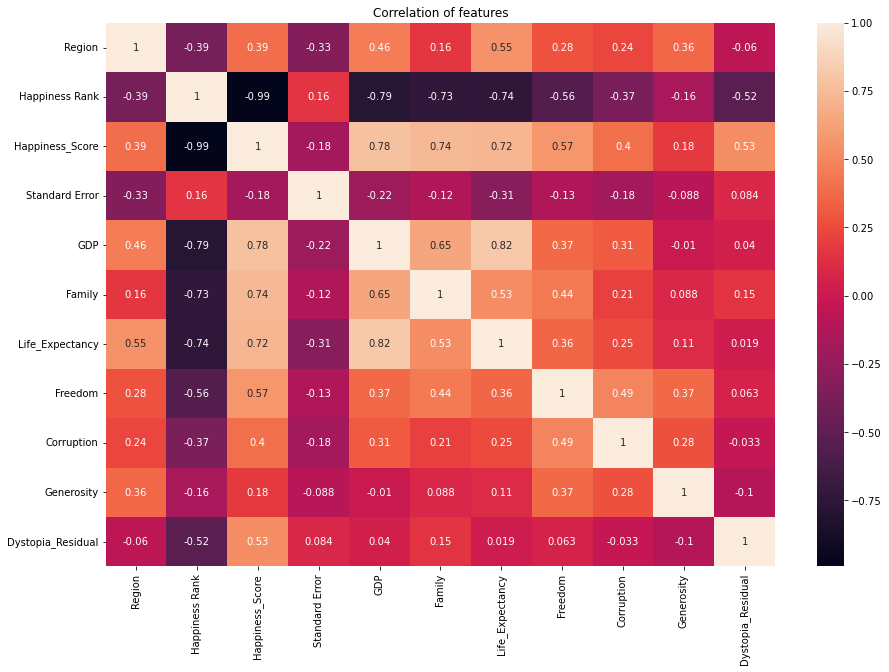

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),color="Blue",annot=True)
plt.title('Correlation of features')
plt.show()

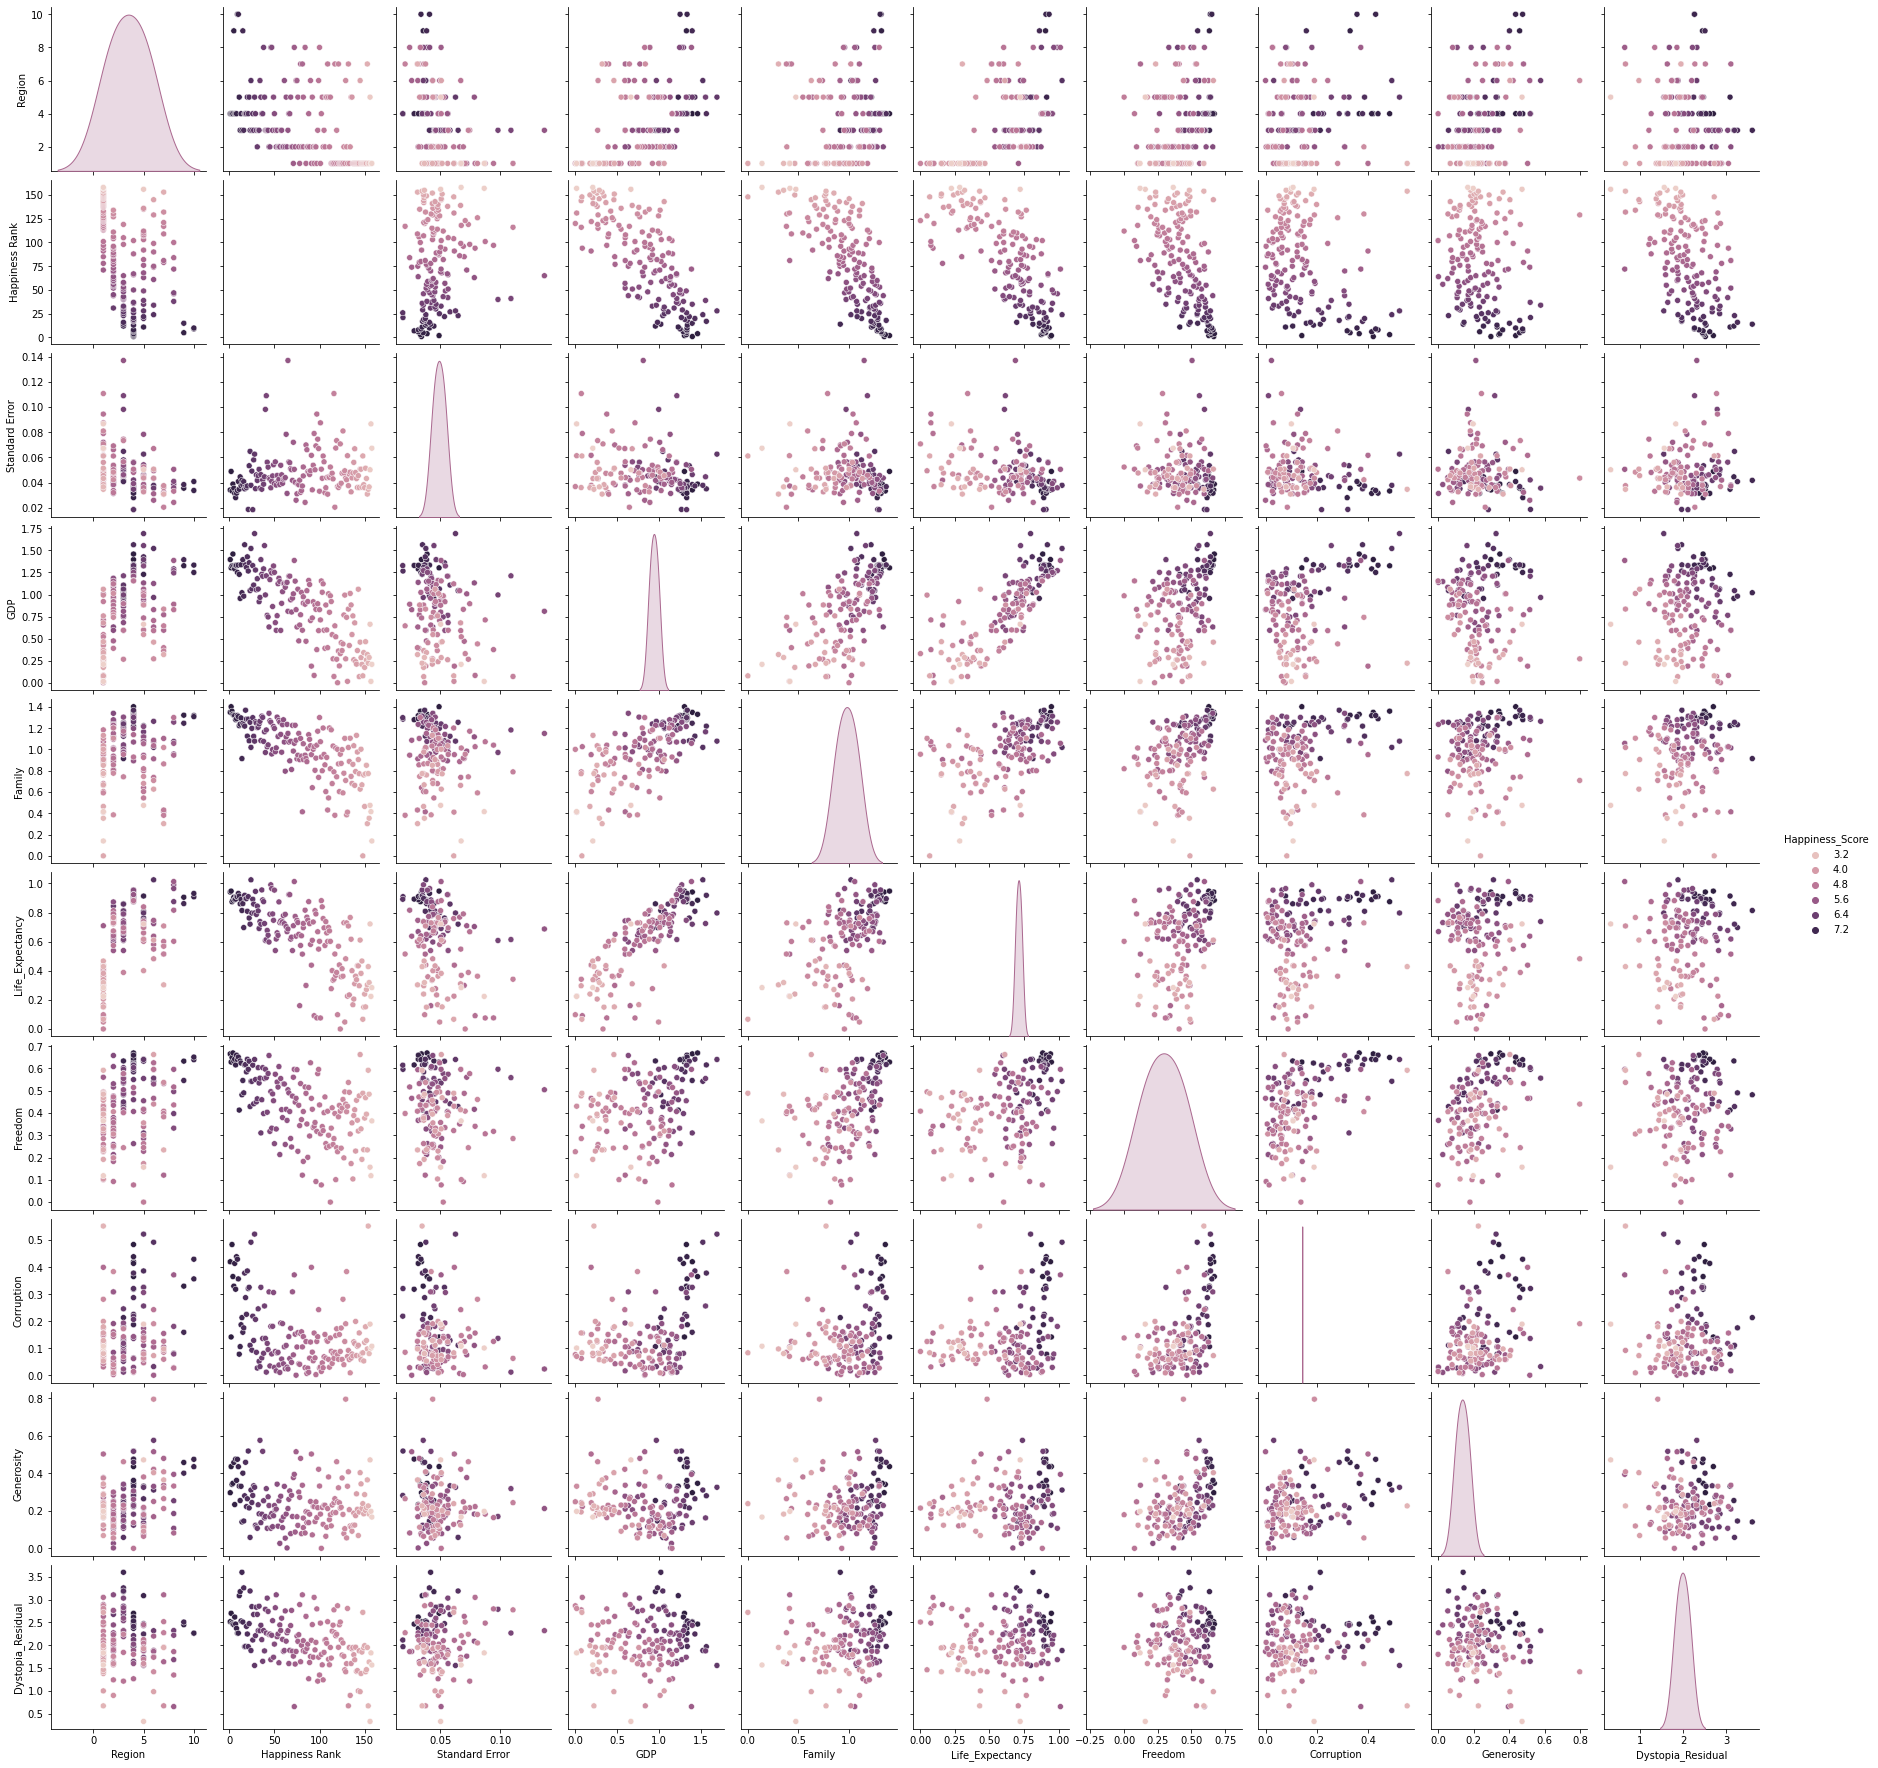

In [43]:
sns.pairplot(df,hue="Happiness_Score")

<AxesSubplot:xlabel='GDP', ylabel='Happiness_Score'>

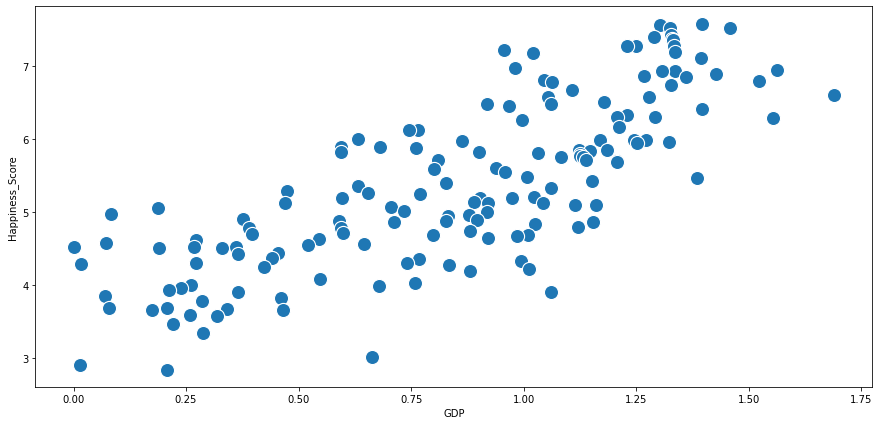

In [44]:
sns.scatterplot(x='GDP',y='Happiness_Score',data=df,s=200)

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Happiness_Score'>

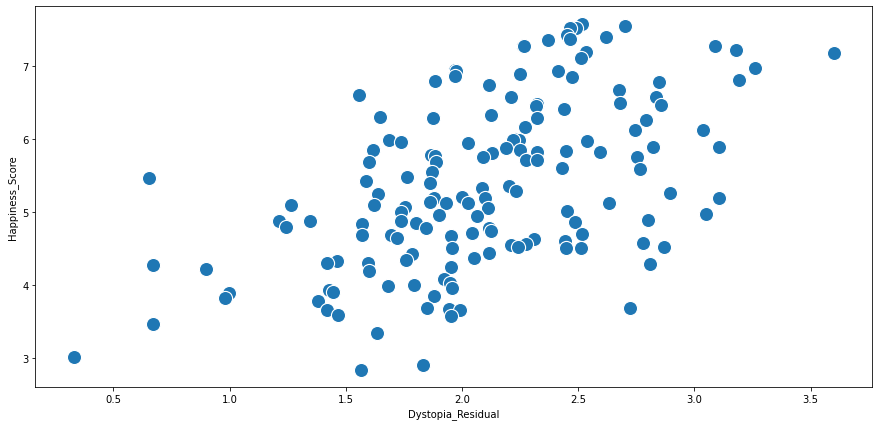

In [45]:
sns.scatterplot(x='Dystopia_Residual',y='Happiness_Score',data=df,s=200)

# Checking the outliers

Region                  AxesSubplot(0.125,0.536818;0.110714x0.343182)
Happiness Rank       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Happiness_Score      AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Standard Error       AxesSubplot(0.523571,0.536818;0.110714x0.343182)
GDP                  AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Family               AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Life_Expectancy            AxesSubplot(0.125,0.125;0.110714x0.343182)
Freedom                 AxesSubplot(0.257857,0.125;0.110714x0.343182)
Corruption              AxesSubplot(0.390714,0.125;0.110714x0.343182)
Generosity              AxesSubplot(0.523571,0.125;0.110714x0.343182)
Dystopia_Residual       AxesSubplot(0.656429,0.125;0.110714x0.343182)
dtype: object

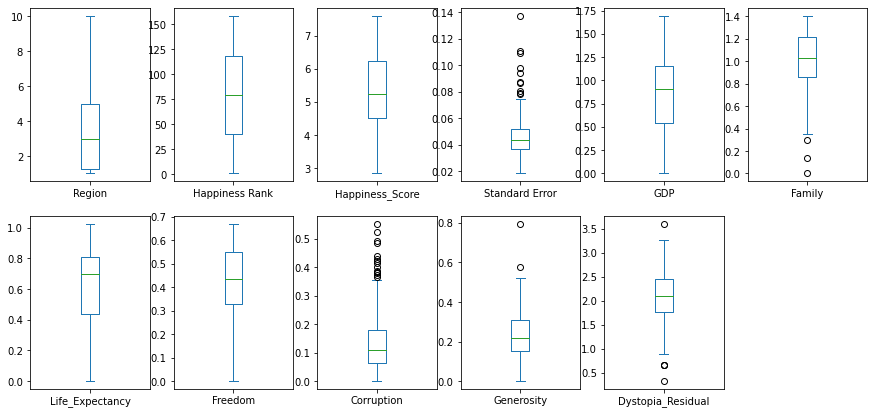

In [46]:
df.plot(kind='box',subplots=True,layout=(2,6))

There is outliers 

In [47]:
df.drop(['Country'],inplace=True,axis=1)

In [48]:
type(df)

pandas.core.frame.DataFrame

# Removing the Outliers

In [49]:
z=np.abs(zscore(df))
z

,Region,Happiness Rank,Happiness_Score,Standard Error,GDP,Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia_Residual
0,0.270981,1.721000,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,0.270981,1.699075,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,0.270981,1.677149,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,0.270981,1.655224,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,2.524402,1.633299,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...,...,...
153,1.081072,1.633576,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.081072,1.655501,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,0.721665,1.677427,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,1.081072,1.699352,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [50]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [51]:
df=df[(z<3).all(axis=1)]

In [52]:
df.shape

(149, 11)

<AxesSubplot:ylabel='Count'>

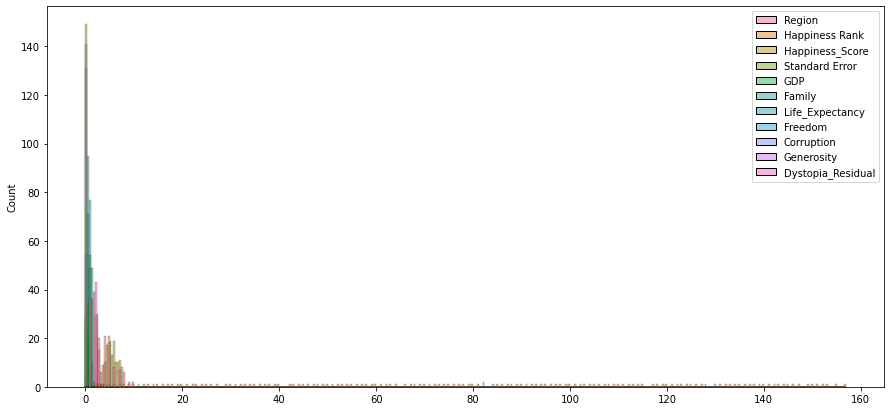

In [53]:
sns.histplot(df)

In [54]:
X=df.drop('Happiness_Score',axis=1)

In [55]:
y=df['Happiness_Score']

In [56]:
X.shape

(149, 10)

In [57]:
y.shape

(149,)

# Scaling of data

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [59]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [60]:
X.head()

,Region,Happiness Rank,Standard Error,GDP,Family,Life_Expectancy,Freedom,Corruption,Generosity,Dystopia_Residual
0,0.333333,0.000000,0.196283,0.892961,0.952046,0.918244,0.993789,0.853038,0.514975,0.632017
1,0.333333,0.006410,0.381263,0.832733,1.000000,0.924496,0.938841,0.287442,0.757071,0.694649
2,0.333333,0.012821,0.185860,0.847542,0.962115,0.853099,0.969615,0.982666,0.592382,0.623420
3,0.333333,0.019231,0.255180,0.932918,0.935163,0.863409,1.000000,0.741780,0.602100,0.614353
4,0.888889,0.025641,0.214115,0.848060,0.927577,0.883326,0.945112,0.669722,0.794916,0.609756


# Finding the best Random State

In [79]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    x_pred=mod.predict(x_test)
    acc=r2_score(y_test,x_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

        
print("Maximum r2 score is ", maxAccu,"at Random State :",maxRS)

Maximum r2 score is  0.9991775038721118 at Random State : 177


# Splitting of dataset

In [80]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=177)

In [85]:
x_train.shape

(99, 10)

In [86]:
y_train.shape

(99,)

# Applying the Machine Learing algorithm

In [87]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Accuracy of the Model ",lr.score(x_train,y_train))

Accuracy of the Model  0.999999942493331


In [88]:
y_pred=lr.predict(x_test)

In [89]:
lr_mse=mean_squared_error(y_test,y_pred)
print("MSE for Linear Regression is ",lr_mse)

MSE for Linear Regression is  9.062566058015055e-08


In [90]:
# another regression model
from sklearn.svm import SVR
from sklearn.metrics import r2_score
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    svr.score(x_train,y_train)
    pred=svr.predict(x_test)
    print("Accuracy :",r2_score(y_test,pred))
    svr_mse=mean_squared_error(y_test,svr.predict(x_test))
    print("MSE for SVR",svr_mse)

Accuracy : 0.9973464932945764
MSE for SVR 0.0031138319794213015
Accuracy : 0.9931736507334098
MSE for SVR 0.00801057129630058
Accuracy : 0.967443578945926
MSE for SVR 0.03820424678274795


In [91]:
# another regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#x_train, y_train = make_regression(n_features=4, n_informative=2,
                        #random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=100)
regr.fit(x_train, y_train)
#rfr=RandomForestRegressor(n_estimators =100)
#rfr.fit(x_train,y_train)
print("Accuracy of RFR:",regr.score(x_train,y_train))

Accuracy of RFR: 0.9992423619158192


In [92]:
regr_mse=mean_squared_error(y_test,regr.predict(x_test))
regr_rmse=np.sqrt(regr_mse)
print("MSE for RFR:",regr_mse)
print("RMSE for RFR:",regr_rmse)

MSE for RFR: 0.0019115235724063973
RMSE for RFR: 0.043720974056011115


In [93]:
from sklearn import neighbors


In [94]:
for k in range(10):
    k=k+1
    model=neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train,y_train)  # fit the model
    y_pred=model.predict(x_test)
    error=mean_squared_error(y_test,y_pred)
    print("Accuracy score for k =",k,'is:',model.score(x_train,y_train))
    print("MSE value for k =",k,'is:',error)
    

Accuracy score for k = 1 is: 1.0
MSE value for k = 1 is: 0.18794922000000003
Accuracy score for k = 2 is: 0.9643026710921542
MSE value for k = 2 is: 0.12992647
Accuracy score for k = 3 is: 0.9546086430008303
MSE value for k = 3 is: 0.12397749111111113
Accuracy score for k = 4 is: 0.9459677478182664
MSE value for k = 4 is: 0.11051353749999997
Accuracy score for k = 5 is: 0.9433843574882436
MSE value for k = 5 is: 0.09647099759999994
Accuracy score for k = 6 is: 0.9405072573751696
MSE value for k = 6 is: 0.09081531777777775
Accuracy score for k = 7 is: 0.937119740621399
MSE value for k = 7 is: 0.07531085632653058
Accuracy score for k = 8 is: 0.9357018763020865
MSE value for k = 8 is: 0.07003809000000003
Accuracy score for k = 9 is: 0.9316017134828719
MSE value for k = 9 is: 0.07969604790123458
Accuracy score for k = 10 is: 0.9274850603210867
MSE value for k = 10 is: 0.07770186940000003


So we can see the random forest regressonr is the best model with 99% accuracy and MSE 0.00197

# Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,200],'max_features':['auto','log2'],'max_depth':np.arange(2,10),'min_samples_split':[2,3,4,5]}

In [100]:
from sklearn.model_selection import GridSearchCV
GSV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GSV.fit(x_train,y_train)
GSV.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 200}

In [107]:
final_mod=RandomForestRegressor(max_depth=9,max_features='auto',min_samples_split=2,n_estimators=200)
final_mod.fit(X,y)
y_pred=final_mod.predict(x_test)
acc=final_mod.score(x_train,y_train)

print(acc*100)

99.92199523547562


In [109]:
regr_mse=mean_squared_error(y_test,final_mod.predict(x_test))
regr_rmse=np.sqrt(regr_mse)
print("MSE for RFR:",regr_mse)
print("RMSE for RFR:",regr_rmse)


MSE for RFR: 0.0001251418459447727
RMSE for RFR: 0.011186681632404343


# Saving the final model

In [110]:
import joblib
joblib.dump(final_mod,'Happyness_score.obj')

['Happyness_score.obj']